# FIN3080 Assignment 1
#### 122090091 Dou Boshu

---

## Problem 1&2

### preparation session

Reading Data:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取包含股价数据的表格
df_price = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/Monthly Stock Price  Returns195304510/TRD_Mnth.xlsx')
# 读取包含公司经营的表格
df_balance_sheet = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/Balance Sheet(Merge Query)111043005/FS_Combas(Merge Query).xlsx')
# 包含公司基本信息的表格
df_company_profile = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/Company Profile123854454/TRD_Co.xlsx')
# 包含Net Assets per Share的表格
df_Net_Assets_per_Share = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/Net_assets_Per_Share_new/Net_Assets_Per_Share.xlsx')
# 读取包含EPS_TTM的表格
df_EPS_TTM = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/TTM/TTM.xlsx')


Cleaning Data:

In [20]:
# print(df_price.head())
# print(df_price.dtypes)
# df_price.iloc[:, 0] = df_price.index[1]
# df_price = df_price.drop(df_price.index[:0])
# df_balance_sheet = df_balance_sheet.drop(1)
# df_company_profile = df_company_profile.drop(1)
# print(df_price)

# 删除第一行数据
df_price = df_price.drop(0)
df_balance_sheet = df_balance_sheet.drop(0)
df_company_profile = df_company_profile.drop(0)
df_Net_Assets_per_Share = df_Net_Assets_per_Share.drop(0)
df_EPS_TTM = df_EPS_TTM.drop(0)


# 重置索引
df_price = df_price.reset_index(drop=True)
df_balance_sheet = df_balance_sheet.reset_index(drop=True)
df_company_profile = df_company_profile.reset_index(drop=True)
df_Net_Assets_per_Share = df_Net_Assets_per_Share.reset_index(drop=True)
df_EPS_TTM = df_EPS_TTM.reset_index(drop=True)

# 改变数据类型
# df_price
df_price['Stock_Code'] = df_price['Stock_Code'].astype('string',errors='ignore')
df_price['Market_Value_of_Tradable_Shares'] = df_price['Market_Value_of_Tradable_Shares'].astype('float',errors='ignore')
df_price['Monthly_Return'] = df_price['Monthly_Return'].astype('float',errors='ignore')
df_price['Monthly_Price'] = df_price['Monthly_Price'].astype('float',errors='ignore')
df_price['Monthly_Price'] = df_price['Monthly_Price'].astype('float',errors='ignore')
# df_price['Trading_Month'] = pd.to_datetime(df_price['Trading_Month'], errors='coerce',format='%Y-%m')
df_price['Trading_Month'] = df_price['Trading_Month'].astype('string', errors='ignore')

# df_balance_sheet
df_balance_sheet['Stock_Code'] = df_balance_sheet['Stock_Code'].astype('string',errors='ignore')
# df_balance_sheet['Ending_Date'] = pd.to_datetime(df_balance_sheet['Ending_Date'], errors='coerce',format='%Y-%m-%d')
df_balance_sheet['Ending_Date'] = df_balance_sheet['Ending_Date'].astype('string', errors='ignore')
df_balance_sheet['Stock_Short_Name'] = df_balance_sheet['Stock_Short_Name'].astype('string', errors='ignore')
df_balance_sheet['Statement_Type'] = df_balance_sheet['Statement_Type'].astype('string', errors='ignore')
df_balance_sheet['Total_Assets'] = df_balance_sheet['Total_Assets'].astype('float', errors='ignore')
df_balance_sheet['Total_Liabilities'] = df_balance_sheet['Total_Liabilities'].astype('float', errors='ignore')
df_balance_sheet['EPS_1'] = df_balance_sheet['EPS_1'].astype('float', errors='ignore')
df_balance_sheet['ROA_A'] = df_balance_sheet['ROA_A'].astype('float', errors='ignore')
df_balance_sheet['ROE_A'] = df_balance_sheet['ROE_A'].astype('float', errors='ignore')
df_balance_sheet['R&D_Expenses'] = df_balance_sheet['R&D_Expenses'].astype('float', errors='ignore')

# df_company_profile
df_company_profile['Stock_Code'] = df_company_profile['Stock_Code'].astype('string',errors='ignore')
df_company_profile['Stock_Acronym'] = df_company_profile['Stock_Acronym'].astype('string', errors='ignore')
df_company_profile['Date_Listed'] = pd.to_datetime(df_company_profile['Date_Listed'], errors='coerce',format='%Y-%m-%d')
df_company_profile['Establishment_Date'] = pd.to_datetime(df_company_profile['Establishment_Date'], errors='coerce',format='%Y-%m-%d')
# df_company_profile['Establishment_Date'] = df_company_profile['Establishment_Date'].astype('string', errors='ignore')
df_company_profile['Market_Type'] = df_company_profile['Market_Type'].astype('string',errors='ignore')

# df_Net_Assets_per_Share
df_Net_Assets_per_Share['Stock_Code'] = df_Net_Assets_per_Share['Stock_Code'].astype('string',errors='ignore')
df_Net_Assets_per_Share['Stock_Short_Name'] = df_Net_Assets_per_Share['Stock_Short_Name'].astype('string',errors='ignore')
df_Net_Assets_per_Share['Ending_Date'] = df_Net_Assets_per_Share['Ending_Date'].astype('string',errors='ignore')
df_Net_Assets_per_Share['Statement_Type'] = df_Net_Assets_per_Share['Statement_Type'].astype('string',errors='ignore')
df_Net_Assets_per_Share['Net_Assets_per_Share'] = df_Net_Assets_per_Share['Net_Assets_per_Share'].astype('float',errors='ignore')

# df_EPS_TTM
df_EPS_TTM['Stock_Code'] = df_EPS_TTM['Stock_Code'].astype('string',errors='ignore')
df_EPS_TTM['Stock_Short_Name'] = df_EPS_TTM['Stock_Short_Name'].astype('string',errors='ignore')
df_EPS_TTM['Ending_Date'] = df_EPS_TTM['Ending_Date'].astype('string',errors='ignore')
df_EPS_TTM['Statement_Type'] = df_EPS_TTM['Statement_Type'].astype('string',errors='ignore')
df_EPS_TTM['EPS_TTM1'] = df_EPS_TTM['EPS_TTM1'].astype('float',errors='ignore')

# print(df_company_profile)
# df_company_profile.dtypes

# 删除包含数值为 'B' 的元素所在的行
df_balance_sheet = df_balance_sheet.drop(df_balance_sheet[df_balance_sheet['Statement_Type'] == 'B'].index)
df_Net_Assets_per_Share = df_Net_Assets_per_Share.drop(df_Net_Assets_per_Share[df_Net_Assets_per_Share['Statement_Type'] == 'B'].index)
df_EPS_TTM = df_EPS_TTM.drop(df_EPS_TTM[df_EPS_TTM['Statement_Type'] == 'B'].index)

# 重置索引
df_balance_sheet = df_balance_sheet.reset_index(drop=True)
df_Net_Assets_per_Share = df_Net_Assets_per_Share.reset_index(drop=True)
df_EPS_TTM = df_EPS_TTM.reset_index(drop=True)
# print(df_EPS_TTM)


Writing get_data() Function for df_price to generate lagged variables:

In [21]:
def get_date(p_date):
    old_year = p_date[:4]
    old_year = int(old_year)
    str_old_month = p_date[-2:]
    
    if str_old_month in ['01', '02', '03']:
        new_year = old_year - 1  # 去年的第4季度, year_12_31
        new_month = '12'
        new_day = '31'
    elif str_old_month in ['04', '05', '06']:
        new_year = old_year   # 今年的第1季度, year_03_31
        new_month = '03'
        new_day = '31'
    elif str_old_month in ['07', '08', '09']:
        new_year = old_year   # 今年的第2季度, year_06_30
        new_month = '06'
        new_day = '30'
    elif str_old_month in ['10', '11', '12']:
        new_year = old_year  # 今年的第3季度, year_09_30
        new_month = '09'
        new_day = '30'

    new_date = str(new_year) + '-' + new_month + '-' + new_day
    return new_date

df_price_2 = df_price.copy()
df_price_2['Ending_Date'] = df_price_2['Trading_Month'].apply(get_date)
# print(df_price_2)
df_price_2['Ending_Date'] = df_price_2['Ending_Date'].astype('string',errors='ignore')
# df_price_2.dtypes

Merging

In [22]:
# 合并 df_price_2 与 df_balance_sheet
df_left_join_result = pd.merge(df_price_2, df_balance_sheet, on=['Stock_Code', 'Ending_Date',], how='left')
# 再合并进 df_Net_Assets_per_Share
df_left_join_result = pd.merge(df_left_join_result, df_Net_Assets_per_Share, on=['Stock_Code', 'Ending_Date',], how='left')
# 再合并进 df_EPS_TTM
df_left_join_result = pd.merge(df_left_join_result, df_EPS_TTM, on=['Stock_Code', 'Ending_Date',], how='left')
# 再合并进 df_company_profile
df_left_join_result = pd.merge(df_left_join_result, df_company_profile, on='Stock_Code', how='left')

print(df_left_join_result)
# df_left_join_result.dtypes

       Stock_Code Trading_Month  Monthly_Price  \
0          000001       2000-01          18.53   
1          000001       2000-02          18.32   
2          000001       2000-03          18.37   
3          000001       2000-04          19.05   
4          000001       2000-05          18.00   
...           ...           ...            ...   
679944     873593       2023-06         133.40   
679945     873593       2023-07          86.00   
679946     873593       2023-08          77.50   
679947     873593       2023-09          36.06   
679948     873665       2023-09           5.88   

        Market_Value_of_Tradable_Shares  Monthly_Return Ending_Date  \
0                           19843822.88        0.061891  1999-12-31   
1                           19618933.36       -0.011333  1999-12-31   
2                           19672478.48        0.002729  1999-12-31   
3                           20400692.17        0.037017  2000-03-31   
4                           19276244.57     

### Problem 1 (a)

Calculating: PE, PB, R&D/Total_Asset, Firm_Ages

In [23]:
df_left_join_result['P/E'] = df_left_join_result['Monthly_Price'] / (df_left_join_result['EPS_TTM1'])
df_left_join_result['P/B'] = df_left_join_result['Monthly_Price'] / df_left_join_result['Net_Assets_per_Share']
df_left_join_result['Quarterly_R&D_Expense/Total_Asset_Ratios'] = df_left_join_result['R&D_Expenses'] / df_left_join_result['Total_Assets']

# 获取当前日期（忽略时间部分）
current_date = pd.to_datetime('now').to_period('Q')
# print(type(current_date))

df_left_join_result['Establishment_Date2'] = pd.to_datetime(df_left_join_result['Establishment_Date']).dt.to_period('Q')
df_left_join_result['Quarterly_Firm_Ages'] = (current_date - df_left_join_result['Establishment_Date2']).apply(lambda x: x.n)
print(df_left_join_result)
# df_left_join_result.dtypes

       Stock_Code Trading_Month  Monthly_Price  \
0          000001       2000-01          18.53   
1          000001       2000-02          18.32   
2          000001       2000-03          18.37   
3          000001       2000-04          19.05   
4          000001       2000-05          18.00   
...           ...           ...            ...   
679944     873593       2023-06         133.40   
679945     873593       2023-07          86.00   
679946     873593       2023-08          77.50   
679947     873593       2023-09          36.06   
679948     873665       2023-09           5.88   

        Market_Value_of_Tradable_Shares  Monthly_Return Ending_Date  \
0                           19843822.88        0.061891  1999-12-31   
1                           19618933.36       -0.011333  1999-12-31   
2                           19672478.48        0.002729  1999-12-31   
3                           20400692.17        0.037017  2000-03-31   
4                           19276244.57     

### Problem 1 (b)

Dividing by market type and generating summary statistics (observations, mean, median, p25, p75, standard deviation):

In [24]:
# 根据 'Market_Type' 划分为 'main board' 和 'GEM'
main_board_data = df_left_join_result[df_left_join_result['Market_Type'].isin(['1', '4', '64'])]
gem_data = df_left_join_result[df_left_join_result['Market_Type'].isin(['16', '32'])]

# print(main_board_data)
# print(gem_data)

summary_main_board = main_board_data.dropna().describe()
summary_gem_board = gem_data.describe()
summary_main_board = summary_main_board[['Monthly_Return', 'P/E', 'P/B', 'ROA_A', 'ROE_A', 'Quarterly_R&D_Expense/Total_Asset_Ratios', 'Quarterly_Firm_Ages']]
summary_gem_board = summary_gem_board[['Monthly_Return', 'P/E', 'P/B', 'ROA_A', 'ROE_A', 'Quarterly_R&D_Expense/Total_Asset_Ratios', 'Quarterly_Firm_Ages']]

new_Main_column_names = {'Monthly_Return': 'Main_Monthly_Return', 'P/E': 'Main_P/E', 'P/B': 'Main_P/B', 'ROA_A': 'Main_ROA_A', 'ROE_A': 'Main_ROE_A',
                         'Quarterly_R&D_Expense/Total_Asset_Ratios': 'Main_Quarterly_R&D_Expense/Total_Asset_Ratios', 'Quarterly_Firm_Ages': 'Main_Quarterly_Firm_Ages'}

new_GEM_column_names = {'Monthly_Return': 'GEM_Monthly_Return', 'P/E': 'GEM_P/E', 'P/B': 'GEM_P/B', 'ROA_A': 'GEM_ROA_A', 'ROE_A': 'GEM_ROE_A',
                         'Quarterly_R&D_Expense/Total_Asset_Ratios': 'GEM_Quarterly_R&D_Expense/Total_Asset_Ratios', 'Quarterly_Firm_Ages': 'GEM_Quarterly_Firm_Ages'}

summary_main_board = summary_main_board.rename(columns=new_Main_column_names)
summary_gem_board = summary_gem_board.rename(columns=new_GEM_column_names)

print(summary_main_board)
print(summary_gem_board)


       Main_Monthly_Return       Main_P/E       Main_P/B     Main_ROA_A  \
count        152906.000000  152906.000000  152906.000000  152906.000000   
mean              0.010593      47.613919       3.406519       0.033204   
min              -0.882166 -190526.315789       0.054057      -3.323744   
25%              -0.066351      10.100261       1.365159       0.009313   
50%              -0.003401      22.319746       2.092187       0.026129   
75%               0.067271      43.026675       3.322087       0.052952   
max               3.503394  388333.333333    6904.761905       9.112961   
std               0.133481    2577.798998      33.155507       0.092625   

          Main_ROE_A  Main_Quarterly_R&D_Expense/Total_Asset_Ratios  \
count  152906.000000                                  152906.000000   
mean        0.010845                                       0.012410   
min      -207.397068                                      -0.002272   
25%         0.009907                    

### Problem 2

Plotting:

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10772/3930701365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_board_data['Trading_Month'] = pd.to_datetime(main_board_data['Trading_Month'])
/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10772/3930701365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gem_data['Trading_Month'] = pd.to_datetime(gem_data['Trading_Month'])


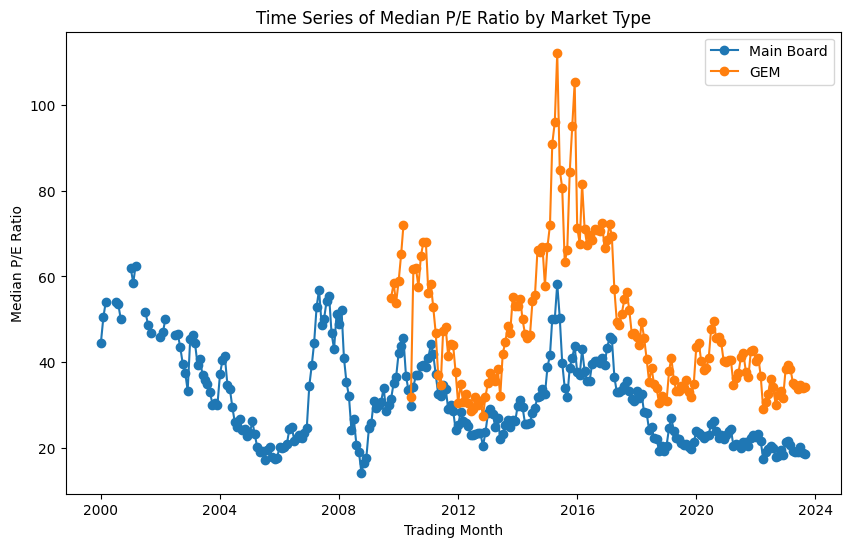

In [25]:
# 将 'Trading_Month' 列转换为 datetime 类型
main_board_data['Trading_Month'] = pd.to_datetime(main_board_data['Trading_Month'])
gem_data['Trading_Month'] = pd.to_datetime(gem_data['Trading_Month'])

# 计算两个市场类型的中位数 P/E 比率
median_pe_main_board = main_board_data.groupby('Trading_Month')['P/E'].median()
median_pe_gem = gem_data.groupby('Trading_Month')['P/E'].median()

# 绘制时间序列图
plt.figure(figsize=(10, 6))
plt.plot(median_pe_main_board.index, median_pe_main_board, label='Main Board', marker='o')
plt.plot(median_pe_gem.index, median_pe_gem, label='GEM', marker='o')

# 添加标签和标题
plt.xlabel('Trading Month')
plt.ylabel('Median P/E Ratio')
plt.title('Time Series of Median P/E Ratio by Market Type')
plt.legend()

# show
plt.show()

### Problem 3

Reading Data & Cleaning Data:

In [44]:
# # 设置 Pandas 显示选项，显示所有行和列
# pd.set_option('display.max_rows', None)  # 显示所有行
# pd.set_option('display.max_columns', None)  # 显示所有列

# # 恢复默认显示选项
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


df_problem3_data = pd.read_csv('/Users/douboshu/Documents/大二下/FIN3080/AS1/DATA/problem3_data.csv')
print(df_problem3_data)
df_problem3_data.dtypes

# 将日期列转换为 datetime 类型
df_problem3_data['EndDate'] = pd.to_datetime(df_problem3_data['EndDate'])
df_problem3_data.dtypes

# 筛选出指定日期范围的数据（2011 年至 2020 年）
start_date = pd.to_datetime('2010-12-31')
end_date = pd.to_datetime('2020-12-31')
df_filtered_data = df_problem3_data[(df_problem3_data['EndDate'] >= start_date) & (df_problem3_data['EndDate'] <= end_date)]
df_filtered_data = df_filtered_data.reset_index(drop=True)
print(df_filtered_data)

       Symbol     EndDate  TotalRevenue    ROEC
0           1  2000-12-31  1.431286e+09  0.1326
1           1  2001-12-31  2.118441e+09  0.0962
2           1  2002-12-31  3.077099e+09  0.1169
3           1  2003-12-31  3.128836e+09  0.0819
4           1  2004-12-31  4.480811e+09  0.0670
...       ...         ...           ...     ...
57266  900957  2018-12-31  1.061131e+08  0.0633
57267  900957  2019-12-31  1.050223e+08  0.0546
57268  900957  2020-12-31  9.940559e+07  0.0448
57269  900957  2021-12-31  1.130710e+08  0.0539
57270  900957  2022-12-31  1.199133e+08  0.0742

[57271 rows x 4 columns]
       Symbol    EndDate  TotalRevenue    ROEC
0           1 2010-12-31  1.756183e+10  0.2342
1           1 2011-12-31  2.908733e+10  0.1914
2           1 2012-12-31  3.891140e+10  0.1687
3           1 2013-12-31  5.129400e+10  0.1547
4           1 2014-12-31  7.063700e+10  0.1630
...       ...        ...           ...     ...
33395  900957 2016-12-31  8.062995e+07  0.0075
33396  900957 2017-12-

Generating median for ROE and Growth Rate

In [45]:
# 生成一列专门写Year
df_filtered_data['Year'] = df_filtered_data['EndDate'].dt.year
# print(df_filtered_data)

# 计算每家公司每年的总收入增长率
df_filtered_data['Company_Growth_Rate'] = df_filtered_data['TotalRevenue'].pct_change()
print(df_filtered_data)


# 计算每年的 ROE 中位数并将结果转化为dataframe
Annual_ROE_Median = df_filtered_data.groupby('Year')['ROEC'].median()
df_A_R_M = Annual_ROE_Median.to_frame()
df_A_R_M = df_A_R_M.iloc[1: , :]
# print(df_A_R_M)



# 计算每年公司增长率的中位数并将结果转化为dataframe
Annual_Median_Growth_Rate = df_filtered_data.groupby('Year')['Company_Growth_Rate'].median()
df_A_M_G_R = Annual_Median_Growth_Rate.to_frame()
df_A_M_G_R = df_A_M_G_R.iloc[1: , :]
# print(df_A_M_G_R)

       Symbol    EndDate  TotalRevenue    ROEC  Year  Company_Growth_Rate
0           1 2010-12-31  1.756183e+10  0.2342  2010                  NaN
1           1 2011-12-31  2.908733e+10  0.1914  2011             0.656281
2           1 2012-12-31  3.891140e+10  0.1687  2012             0.337744
3           1 2013-12-31  5.129400e+10  0.1547  2013             0.318226
4           1 2014-12-31  7.063700e+10  0.1630  2014             0.377101
...       ...        ...           ...     ...   ...                  ...
33395  900957 2016-12-31  8.062995e+07  0.0075  2016             0.548425
33396  900957 2017-12-31  9.811317e+07  0.0734  2017             0.216833
33397  900957 2018-12-31  1.061131e+08  0.0633  2018             0.081537
33398  900957 2019-12-31  1.050223e+08  0.0546  2019            -0.010279
33399  900957 2020-12-31  9.940559e+07  0.0448  2020            -0.053481

[33400 rows x 6 columns]


/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10772/3912085895.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_filtered_data['Company_Growth_Rate'] = df_filtered_data['TotalRevenue'].pct_change()


Cleaning the result dataframes

In [46]:
df_filtered_data = df_filtered_data.drop(0)
df_filtered_data2 = df_filtered_data.copy()
df_filtered_data3 = df_filtered_data.copy()

df_A_R_M = df_A_R_M.reset_index()
df_A_M_G_R = df_A_M_G_R.reset_index()
print(df_A_R_M)
print(df_A_M_G_R)

   Year    ROEC
0  2011  0.0912
1  2012  0.0731
2  2013  0.0684
3  2014  0.0701
4  2015  0.0689
5  2016  0.0753
6  2017  0.0819
7  2018  0.0701
8  2019  0.0718
9  2020  0.0781
   Year  Company_Growth_Rate
0  2011             0.160729
1  2012             0.059488
2  2013             0.105678
3  2014             0.075344
4  2015             0.031322
5  2016             0.099070
6  2017             0.160024
7  2018             0.107928
8  2019             0.066351
9  2020             0.038987


Calculating the percentage of firms constantly beating market median factors:

In [47]:
print(df_A_R_M.iloc[0, 1])

# ROE
percent_lst_ROE = []
for i in range(2011, 2021):
    df_data_current_year = df_filtered_data2[df_filtered_data2['Year'] == i]
    num_of_company = len(df_filtered_data[df_filtered_data['Year'] == i])
    # print(num_of_company)
    print(len(df_filtered_data2[df_filtered_data2['Year'] == i]))
    # print(df_data_current_year,'df_data_current_year')
    df_data_2011_ROE = df_data_current_year[df_data_current_year['ROEC'] >= df_A_R_M.iloc[i-2011, 1]]
    # print(df_data_2011_ROE,'df_data_2011_ROE')
    df_filtered_data2 = df_filtered_data2[df_filtered_data2['Symbol'].isin(df_data_2011_ROE['Symbol'])]
    percent_lst_ROE.append(df_data_2011_ROE.shape[0]/num_of_company)
# print(percent_lst_ROE,'ROE')


# Growth Rate
percent_lst_GR = []
for i in range(2011, 2021):
    df_data_current_year = df_filtered_data3[df_filtered_data3['Year'] == i]
    num_of_company = len(df_filtered_data[df_filtered_data['Year'] == i])
    # print(df_data_current_year,'df_data_current_year')
    df_data_2011_GR = df_data_current_year[df_data_current_year['Company_Growth_Rate'] >= df_A_M_G_R.iloc[i-2011, 1]]
    # print(data_2011_company,'data_2011_company')
    df_filtered_data3 = df_filtered_data3[df_filtered_data3['Symbol'].isin(df_data_2011_GR['Symbol'])]
    percent_lst_GR.append(df_data_2011_GR.shape[0]/num_of_company)
# print(percent_lst_GR,'GR')

0.0912
2363
1161
851
709
608
494
415
346
296
258


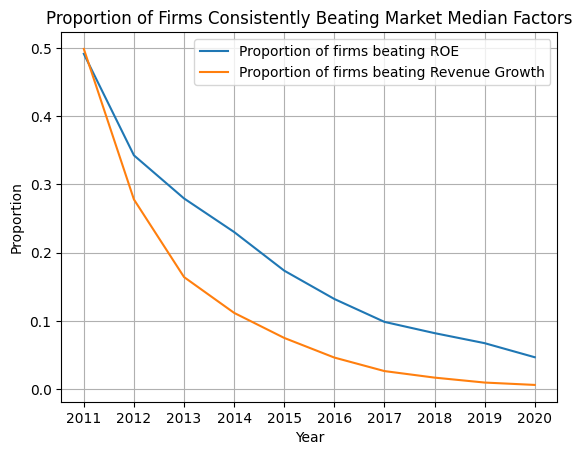

In [35]:
years = list(range(2011, 2021))

# 画折线图
plt.plot(years, percent_lst_ROE, label='Proportion of firms beating ROE')
plt.plot(years, percent_lst_GR, label='Proportion of firms beating Revenue Growth')

# 添加网格
plt.grid(True)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Firms Consistently Beating Market Median Factors')
plt.legend()  # 添加图例

# 设置横轴刻度
plt.xticks(years)

# Show
plt.show()
